### In average, what are the cheapest areas (PLZ / Postal code) one can live in Germany? 🤑 🇩🇪 🏠 
### Can we find some good deals close to the big cities?

# 1 - Introduction

## 1.1 - Dataset Description

The data was scraped from Immoscout24, the biggest real estate platform in Germany. Immoscout24 has listings for both rental properties and homes for sale, however, the data only contains offers for rental properties.

**Content**

The data set contains most of the important properties, such as living area size, the rent, both base rent as well as total rent (if applicable), the location (street and house number, if available, ZIP code and state), type of energy etc. It also has two variables containing longer free text descriptions: description with a text describing the offer and facilities describing all available facilities, newest renovation etc.

## 1.2 - Dataset Dictionary

- **regio1:** Bundesland

- **serviceCharge:** Auxiliary costs such as electricty or internet [Euro]

- **heatingType:** Type of heating

- **telekomTvOffer:** Is payed TV included? If so, which offer?

- **telekomHybridUploadSpeed:** How fast is the hybrid inter upload speed?

- **newlyConst:** Is the building newly constructed?

- **balcony:** Does the object have a balcony?

- **picturecount:** How many pictures were uploaded to the listing?

- **pricetrend:** Price trend as calculated by Immoscout

- **telekomUploadSpeed:** How fast is the internet upload speed?

- **totalRent:** Total rent (usually a sum of base rent, service charge and heating cost)

- **yearConstructed:** Construction year

- **scoutId:** Immoscout Id

- **noParkSpaces:** Number of parking spaces

- **firingTypes:** Main energy sources, separated by colon

- **hasKitchen:** Has a kitchen

- **geo_bln:** Same as regio1

- **cellar:** Has a cellar

- **yearConstructedRange:** Binned construction year, 1 to 9

- **baseRent:** Base rent without electricity and heating

- **houseNumber:** House number

- **livingSpace:** Living space in sqm

- **geo_krs:** District, above ZIP code

- **condition:** Condition of the flat

- **interiorQual:** Interior quality

- **petsAllowed:** Are pets allowed, can be yes, no or negotiable

- **street:** Street name

- **streetPlain:** Street name (plain, different formating)

- **lift:** Is elevator available

- **baseRentRange:** Binned base rent, 1 to 9

- **typeOfFlat:** Type of flat

- **geo_plz:** ZIP code

- **noRooms:** Number of rooms

- **thermalChar:** Energy need in kWh/(m^2a), defines the energy efficiency class

- **floor:** Which floor is the flat on

- **numberOfFloors:** Number of floors in the building

- **noRoomsRange:** Binned number of rooms, 1 to 5

- **garden:** Has a garden

- **livingSpaceRange:** Binned living space, 1 to 7

- **regio2:** District or Kreis, same as geo krs

- **regio3:** City/town

- **description:** Free text description of the object

- **facilities:** Free text description about available facilities

- **heatingCosts:** Monthly heating costs in [Euro]

- **energyEfficiencyClass:** Energy efficiency class (based on binned thermalChar, deprecated since Feb 2020)

- **lastRefurbish:** Year of last renovation

- **electricityBasePrice:** Monthly base price for electricity in € (deprecated since Feb 2020)

- **electricityKwhPrice:** Electricity price per kwh (deprecated since Feb 2020)

- **date:** Time of scraping

# 2 - Development

Importing the necessary libraries:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt

Importing the dataframe:

In [2]:
db = pd.read_csv("./data/immo_data.csv")

Checking the first entries:

In [3]:
db.head()

,regio1,serviceCharge,heatingType,telekomTvOffer,telekomHybridUploadSpeed,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,...,regio2,regio3,description,facilities,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,electricityKwhPrice,date
0,Nordrhein_Westfalen,245.00,central_heating,ONE_YEAR_FREE,NaN,False,False,6,4.62,10.0,...,Dortmund,Schüren,Die ebenerdig zu erreichende Erdgeschosswohnun...,Die Wohnung ist mit Laminat ausgelegt. Das Bad...,NaN,NaN,NaN,NaN,NaN,May19
1,Rheinland_Pfalz,134.00,self_contained_central_heating,ONE_YEAR_FREE,NaN,False,True,8,3.47,10.0,...,Rhein_Pfalz_Kreis,Böhl_Iggelheim,Alles neu macht der Mai – so kann es auch für ...,NaN,NaN,NaN,2019.0,NaN,NaN,May19
2,Sachsen,255.00,floor_heating,ONE_YEAR_FREE,10.0,True,True,8,2.72,2.4,...,Dresden,Äußere_Neustadt_Antonstadt,Der Neubau entsteht im Herzen der Dresdner Neu...,"* 9 m² Balkon\n* Bad mit bodengleicher Dusche,...",NaN,NaN,NaN,NaN,NaN,Oct19
3,Sachsen,58.15,district_heating,ONE_YEAR_FREE,NaN,False,True,9,1.53,40.0,...,Mittelsachsen_Kreis,Freiberg,Abseits von Lärm und Abgasen in Ihre neue Wohn...,NaN,87.23,NaN,NaN,NaN,NaN,May19
4,Bremen,138.00,self_contained_central_heating,NaN,NaN,False,True,19,2.46,NaN,...,Bremen,Neu_Schwachhausen,Es handelt sich hier um ein saniertes Mehrfami...,Diese Wohnung wurde neu saniert und ist wie fo...,NaN,NaN,NaN,NaN,NaN,Feb20


Dropping some data that pollutes the dataset. These entires are test entries with "1234567" as total price, along with other ones where an error ocurred during data collection and (I guess) the comma was misplaced. The identification process for these entires was removed from the notebook, but can be seen on previous versions of it.

In [4]:
db.drop(239533, inplace=True)
db.drop(109047, inplace=True)
db.drop(23490, inplace=True)
db.drop(79903, inplace=True)
db.drop(260259, inplace=True)
db.drop(8406, inplace=True)

Regular database checks:

In [5]:
db.shape #we have 268844 point left. 
good_points=db.shape[0] #to keep track of the original size of the set. 
print(db.shape)

(268844, 49)


## Let's seach for some anomalies. 


In [6]:
db.isnull().sum()

regio1                           0
serviceCharge                 6907
heatingType                  44854
telekomTvOffer               32618
telekomHybridUploadSpeed    223824
newlyConst                       0
balcony                          0
picturecount                     0
pricetrend                    1832
telekomUploadSpeed           33357
totalRent                    40517
yearConstructed              57042
scoutId                          0
noParkSpaces                175795
firingTypes                  56962
hasKitchen                       0
geo_bln                          0
cellar                           0
yearConstructedRange         57042
baseRent                         0
houseNumber                  71016
livingSpace                      0
geo_krs                          0
condition                    68486
interiorQual                112662
petsAllowed                 114570
street                           0
streetPlain                  71011
lift                

In [7]:
db.isna().sum()

regio1                           0
serviceCharge                 6907
heatingType                  44854
telekomTvOffer               32618
telekomHybridUploadSpeed    223824
newlyConst                       0
balcony                          0
picturecount                     0
pricetrend                    1832
telekomUploadSpeed           33357
totalRent                    40517
yearConstructed              57042
scoutId                          0
noParkSpaces                175795
firingTypes                  56962
hasKitchen                       0
geo_bln                          0
cellar                           0
yearConstructedRange         57042
baseRent                         0
houseNumber                  71016
livingSpace                      0
geo_krs                          0
condition                    68486
interiorQual                112662
petsAllowed                 114570
street                           0
streetPlain                  71011
lift                

In [8]:
# what are the different types of `regio`?
db[['regio1', 'regio2', 'regio3']].head()

,regio1,regio2,regio3
0,Nordrhein_Westfalen,Dortmund,Schüren
1,Rheinland_Pfalz,Rhein_Pfalz_Kreis,Böhl_Iggelheim
2,Sachsen,Dresden,Äußere_Neustadt_Antonstadt
3,Sachsen,Mittelsachsen_Kreis,Freiberg
4,Bremen,Bremen,Neu_Schwachhausen


In [9]:
db.rename(columns={'regio1': 'state', 'regio2': 'district', 'regio3': 'town'}, inplace=True)

## lets do a bit of data exploration: what types of flat are there? 

In [10]:
unique_types = db['typeOfFlat'].apply(type).unique()
print("Unique data types in 'typesOfFlat' column:")
print(unique_types)

unique_types = db['typeOfFlat'].unique()
unique_types

Unique data types in 'typesOfFlat' column:
[<class 'str'> <class 'float'>]


array(['ground_floor', 'apartment', 'other', nan, 'roof_storey',
       'raised_ground_floor', 'terraced_flat', 'half_basement',
       'maisonette', 'penthouse', 'loft'], dtype=object)

In [11]:
''' what are 'other' and 'nan' in typesOfFlat''' 
db[db['typeOfFlat'].apply(str) == 'other']

#those are 9518 points.. lets dor more cleaning and see how many remain


,state,serviceCharge,heatingType,telekomTvOffer,telekomHybridUploadSpeed,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,...,district,town,description,facilities,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,electricityKwhPrice,date
3,Sachsen,58.15,district_heating,ONE_YEAR_FREE,NaN,False,True,9,1.53,40.0,...,Mittelsachsen_Kreis,Freiberg,Abseits von Lärm und Abgasen in Ihre neue Wohn...,NaN,87.23,NaN,NaN,NaN,NaN,May19
26,Baden_Württemberg,20.00,NaN,ONE_YEAR_FREE,NaN,False,False,7,4.65,10.0,...,Esslingen_Kreis,Nürtingen,Das im März 2014 komplett renovierte Doppelhau...,Ausstattung Zimmer: \nDie Zimmer sind keine Du...,NaN,NaN,NaN,NaN,NaN,Feb20
52,Sachsen,170.00,gas_heating,ONE_YEAR_FREE,NaN,False,False,16,0.95,40.0,...,Zwickau_Kreis,Hohenstein_Ernstthal, Laminatboden in den Wohn-und Schlafräumen\n...,"Zur Vermietung steht hier im 1. Obergeschoß, i...",NaN,D,NaN,NaN,NaN,Feb20
65,Sachsen,200.00,NaN,ONE_YEAR_FREE,NaN,False,True,13,0.21,40.0,...,Chemnitz,Sonnenberg,Bei dieser ansprechenden Immobilie handelt es ...,"Laminat 2 Jahre alt, Teppichböden 2. DG 2 Jahr...",NaN,NaN,2000.0,NaN,NaN,Oct19
85,Bayern,200.00,gas_heating,ONE_YEAR_FREE,NaN,False,False,11,2.89,10.0,...,Würzburg,Lengfeld,"Helle 4,5-Zimmerwohnung in ruhigem, kleinen Wo...",NaN,NaN,NaN,NaN,NaN,NaN,Oct19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268721,Mecklenburg_Vorpommern,55.00,central_heating,NaN,NaN,False,True,18,0.83,NaN,...,Ludwigslust_Kreis,Boizenburg/Elbe,Achtung: Sollte es bei der Fotoanzeige mit dem...,- schöne EBK\n- Balkon mit toller Aussicht\n- ...,67.00,NaN,NaN,NaN,NaN,May19
268741,Schleswig_Holstein,110.00,district_heating,ONE_YEAR_FREE,10.0,False,True,16,4.44,2.4,...,Kiel,Südfriedhof,Bei dieser ansprechenden Immobilie handelt es ...,NaN,NaN,NaN,NaN,NaN,NaN,May19
268763,Sachsen,130.00,central_heating,ONE_YEAR_FREE,NaN,False,True,11,3.08,40.0,...,Leipzig,Engelsdorf,Die Wohnanlage wurde 1996 erbaut und liegt am ...,"TG-PLatz in Miete enthalten, großer Balkon\nPa...",NaN,A,NaN,90.76,0.2195,Sep18
268795,Sachsen_Anhalt,210.00,district_heating,NaN,NaN,False,True,10,NaN,NaN,...,Magdeburg,Neu_Olvenstedt,U-förmig umschließt die am Westrand von Neu-Ol...,Die Wohnung hat ein geräumiges Wohnzimmer mit ...,NaN,NaN,2019.0,NaN,NaN,Feb20


# data cleaning:
- some places have 0 livingSpace!! we take those out. 
- we can see that 'totalRent' has null values, while baseRent does not. 


In [12]:
''' we calculate, on average, how much higher is totalRent compared to baseRent'''
mean_rent_extra=db['totalRent']/db['baseRent']
mean_rent_extra.describe()


C:\DEV\SharedAppartmentCalculator\SharedAppartmentCalculator\.venv\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


count    2.283200e+05
mean              inf
std               NaN
min      0.000000e+00
25%      1.221239e+00
50%      1.314286e+00
75%      1.419029e+00
max               inf
dtype: float64

### We can see that we cannot do statistics on this set as is. 
Let's clean the rent columns and the livingSpace columns, since we care about them for  our analysis

In [13]:
db['livingSpace'].describe() #some places have 0 living space!! lets take those out

count    268844.000000
mean         74.355360
std         254.761971
min           0.000000
25%          54.000000
50%          67.320000
75%          87.000000
max      111111.000000
Name: livingSpace, dtype: float64

In [14]:
db[db['livingSpace']==0][['livingSpace','baseRent','totalRent']] # 0 living space, but rent is logged.  only 62 entries, lets take it out. 

,livingSpace,baseRent,totalRent
3444,0.0,620.0,890.0
6601,0.0,35.0,35.0
11127,0.0,775.0,865.0
15014,0.0,110.0,110.0
17278,0.0,160.0,NaN
...,...,...,...
247111,0.0,450.0,490.0
248599,0.0,325.0,465.0
254055,0.0,0.0,470.0
266160,0.0,450.0,480.0


In [15]:
''' do we still have small spaces (less than 10 sqm?? )'''
db[db['livingSpace']<=10][['livingSpace','baseRent','totalRent']] # YES, and the prices don't make any sense.  only 107 rows. out they go!!


,livingSpace,baseRent,totalRent
2637,10.0,640.0,690.0
3444,0.0,620.0,890.0
3539,8.0,250.0,335.0
4766,10.0,640.0,690.0
5206,3.0,1584.8,1970.8
...,...,...,...
264985,8.0,610.0,660.0
266035,10.0,640.0,690.0
266160,0.0,450.0,480.0
267385,8.0,160.0,250.0


In [16]:
db[['totalRent','baseRent']].head()

,totalRent,baseRent
0,840.0,595.0
1,NaN,800.0
2,1300.0,965.0
3,NaN,343.0
4,903.0,765.0


In [17]:
print('Nulls in baseRent:', db['baseRent'].isnull().sum(), '\n Nulls in totalRent:', db['totalRent'].isnull().sum())

print('Nans in baseRent:', db['baseRent'].isna().sum(), '\n Nans in totalRent:', db['totalRent'].isna().sum())

Nulls in baseRent: 0 
 Nulls in totalRent: 40517
Nans in baseRent: 0 
 Nans in totalRent: 40517


BUT, 'baseRent' has some 0 values. That doesn't make any sense... 
We will see that this only happens for 89 points, that is 0.03% of our data. So we just take them out.

*Then* we still have to deal with the Null and NAN from 'totalRent' . Those are 40491 points, a good *15%* of our data. Part of these data is also totalRent having 0 values.

In [18]:
db=db[db['livingSpace']>=10] #take out rows where 'baseRent' is less than  10 sqm.
db=db[db['baseRent']!=0] #take out rows where 'baseRent' is 0.

In [19]:
db[db['totalRent']==0][['baseRent','totalRent']] 
print('number of points with totalRent = 0 ',db[db['totalRent']==0]['totalRent'].info() )


'''we have 229 columns where totalRent is 0. Not many .. 0.08% of the remaining data set. it is safer to just take is out.''' 



<class 'pandas.core.series.Series'>
Index: 227 entries, 1119 to 268067
Series name: totalRent
Non-Null Count  Dtype  
--------------  -----  
227 non-null    float64
dtypes: float64(1)
memory usage: 3.5 KB
number of points with totalRent = 0  None


'we have 229 columns where totalRent is 0. Not many .. 0.08% of the remaining data set. it is safer to just take is out.'

In [20]:
db=db[db['totalRent']!=0] #take out rows where 'totalRent' is 0.

In [21]:
db.shape

(268407, 49)

count    227940.000000
mean          1.334763
std           1.158719
min           0.000900
25%           1.222015
50%           1.314286
75%           1.419048
max         215.384615
dtype: float64

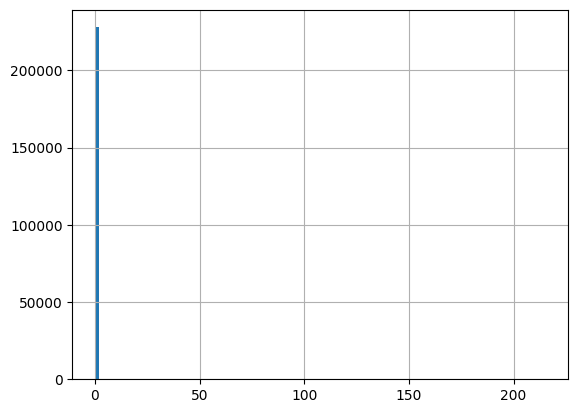

In [22]:
''' we calculate, on average, how much higher is totalRent compared to baseRent'''
mean_rent_extra=db['totalRent']/db['baseRent']

mean_rent_extra.hist(bins=100)
mean_rent_extra.describe()


In [23]:
''' we shuold not have such a big variance, or 0 as a value. '''

' we shuold not have such a big variance, or 0 as a value. '

In [24]:
''' Some places have 215 times the total rent compared to the baseRent... makes no sense'''

''' lets see how many places have double or triple the total rent'''
print('Cases with more than 3 times the totalRent:', db[db['totalRent']>=3*db['baseRent']][['baseRent','totalRent']].shape[0] )
print('Cases with more than 2 times the totalRent:', db[db['totalRent']>=2*db['baseRent']][['baseRent','totalRent']].shape[0] )

Cases with more than 3 times the totalRent: 40
Cases with more than 2 times the totalRent: 266


In [25]:
db=db[db['totalRent']<=2*db['baseRent']] #cleaned

Much Much better!!!!, but we have a few data left that have either smaller values with the total Rent, or the same value... 


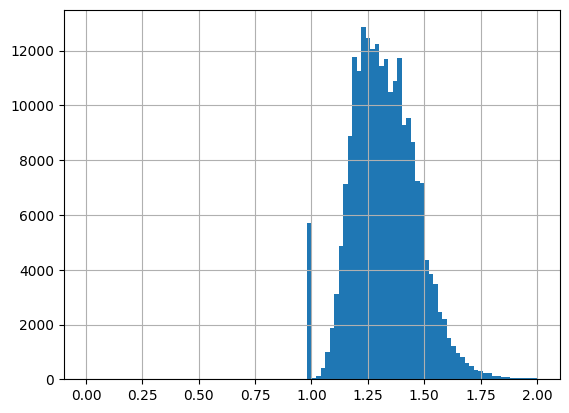

In [26]:
''' we calculate, on average, how much higher is totalRent compared to baseRent'''
mean_rent_extra=db['totalRent']/db['baseRent']
mean_rent_extra.hist(bins=100)
mean_rent_extra.describe()
print('Much Much better!!!!, but we have a few data left that have either smaller values with the total Rent, or the same value... ')

Now we are Talking!! we can use this to replace some weird leftover totalRent values!


count    221803.000000
mean          1.332336
std           0.135719
min           1.000667
25%           1.228070
50%           1.319559
75%           1.422046
max           2.000000
dtype: float64

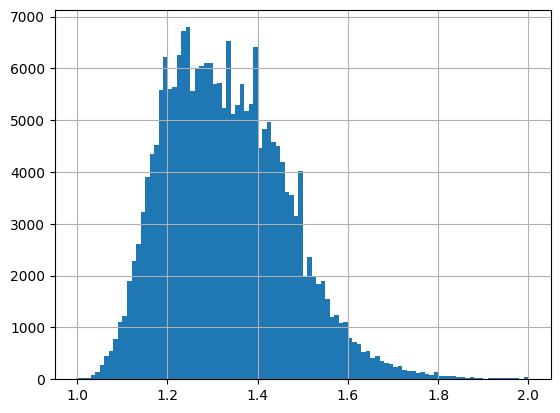

In [27]:
mean_rent_extra[mean_rent_extra>1].hist(bins=100)
print('Now we are Talking!! we can use this to replace some weird leftover totalRent values!')
mean_rent_extra[mean_rent_extra>1].describe()

#df[df['baseRent'] != 0]

### simple imputing for the totalRent
We use the meand and the stardard deviation to change the values of the totalRent that are lower than baseRent. 

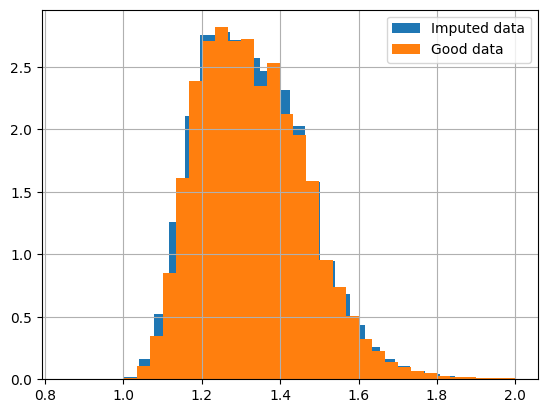

In [28]:
# Set the mean and standard deviation
mean = 1.332336
std = 0.135719
# Generate random numbers
random_numbers = np.random.normal(loc=mean, scale=std, size=len(db.loc[db['totalRent'] <= db['baseRent'], 'totalRent']))

db.loc[db['totalRent'] <= db['baseRent'], 'totalRent'] = random_numbers*db.loc[db['totalRent'] <= db['baseRent'], 'baseRent']

db['extraPropRent']=db['totalRent']/db['baseRent']
db['extraPropRent'].hist(bins=30,density=True,label='Imputed data')
mean_rent_extra[mean_rent_extra>1].hist(bins=30,density=True,label='Good data')
plt.legend()

Now let's see what happens when 'livingSpace' gets involved and if we can have a reasonable rent/sqm. 

count    227718.000000
mean          8.804597
std           5.220106
min           0.006111
25%           5.600000
50%           7.407839
75%          10.256410
max         650.094399
Name: baseRent_per_sqm, dtype: float64


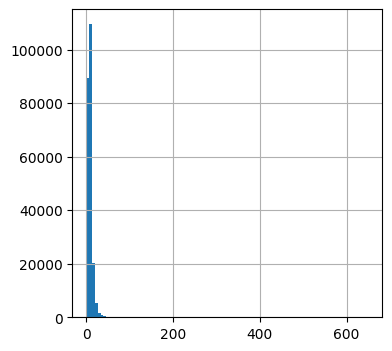

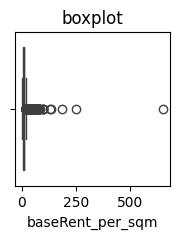

In [29]:
import seaborn as sns

''' make new relevant variables'''
db['baseRent_per_sqm'] = db['baseRent']/db['livingSpace']
db['totalRent_per_sqm'] = db['totalRent']/db['livingSpace']
print(db['baseRent_per_sqm'].describe())

fig=plt.figure(figsize=(4,4))
db['baseRent_per_sqm'].hist(bins=100)
fig2=plt.figure(figsize=(2,2))
ax=sns.boxplot(x=db['baseRent_per_sqm'])
ax.set_title('boxplot')
# Show the plot
plt.show()

<Axes: >

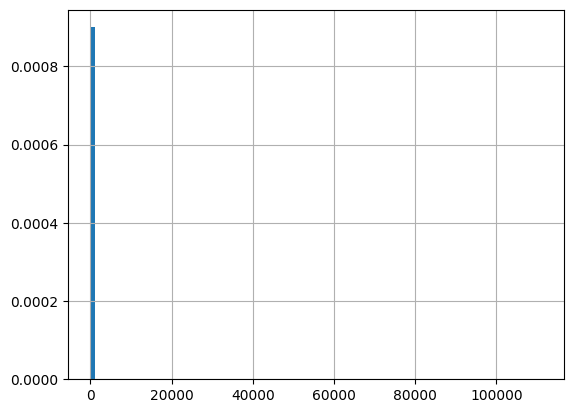

In [30]:
db['livingSpace'].hist(bins=100,density=True)


to-do: check stat properties per zip code. Like, skewness... kr7.. 

''' there are still a few points that need to be cleaned'''
import plotly.express as px
fig = px.box(db, y="baseRent_per_sqm", points="all")
fig.show()

In [32]:

db.drop(['scoutId','electricityBasePrice','electricityKwhPrice','energyEfficiencyClass'], axis=1,inplace=True)

db.to_csv('./data/clean_immo_data.csv', index=False)

Dataset correlation heatmap:

In [41]:
from sklearn.preprocessing import OrdinalEncoder

dcor=db.drop(['state','district','town','scoutId','electricityBasePrice','electricityKwhPrice','geo_krs','energyEfficiencyClass'], axis=1)
categorical_columns = dcor.select_dtypes(include=['object', 'category']).columns

# fill nan values with average values for numerical features
for col in dcor.columns:
    if dcor[col].dtype == 'float':
        dcor[col] = dcor[col].fillna(dcor[col].mean())

# fill nan values with mode for categorical features
for col in dcor.columns:
    if dcor[col].dtype == 'object':
        dcor[col] = dcor[col].fillna(dcor[col].mode()[0])


encoder = OrdinalEncoder()
dcor[categorical_columns] = encoder.fit_transform(dcor[categorical_columns])

cor = dcor.corr()
cor.style.background_gradient(cmap='coolwarm')

C:\DEV\SharedAppartmentCalculator\SharedAppartmentCalculator\.venv\Lib\site-packages\pandas\io\formats\style.py:3807: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
C:\DEV\SharedAppartmentCalculator\SharedAppartmentCalculator\.venv\Lib\site-packages\pandas\io\formats\style.py:3808: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,serviceCharge,heatingType,telekomTvOffer,telekomHybridUploadSpeed,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,noParkSpaces,firingTypes,hasKitchen,geo_bln,cellar,yearConstructedRange,baseRent,houseNumber,livingSpace,condition,interiorQual,petsAllowed,street,streetPlain,lift,baseRentRange,typeOfFlat,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,garden,livingSpaceRange,description,facilities,heatingCosts,lastRefurbish,date,extraPropRent,baseRent_per_sqm,totalRent_per_sqm
serviceCharge,1.000000,0.009468,0.001935,nan,0.043543,0.056147,0.055796,0.058046,0.003146,0.179598,0.028419,0.002472,0.008651,0.035250,-0.047121,0.018347,0.058080,0.171806,-0.021862,0.021381,-0.051383,0.038408,0.003169,0.019247,-0.009411,0.068730,0.155639,0.018592,0.033227,0.073766,-0.017288,0.002316,0.002057,0.126755,0.012421,0.175480,0.013115,-0.008085,0.011241,0.011552,0.004102,-0.032809,0.042210,0.039781
heatingType,0.009468,1.000000,-0.010388,nan,0.084553,0.012870,0.023969,0.090151,-0.013103,0.064468,0.019722,0.003265,0.105847,0.054475,-0.106956,0.025943,0.056248,0.085724,-0.018254,0.010417,-0.112982,0.109527,0.082729,0.015852,-0.012753,-0.021497,0.130020,0.053598,0.144037,0.048499,0.030074,-0.024584,-0.027600,0.083518,0.065543,0.114587,0.012897,0.034372,-0.004105,0.049857,0.001241,-0.245960,0.029263,-0.006162
telekomTvOffer,0.001935,-0.010388,1.000000,nan,0.005534,0.004875,-0.001794,0.005948,0.022493,0.009854,-0.002381,0.002952,-0.034797,-0.010130,0.014992,0.007658,-0.002713,0.009881,0.008460,-0.001021,-0.008806,-0.005265,-0.014500,-0.005337,0.005243,0.023131,0.002709,-0.011329,-0.012771,-0.005424,-0.002274,0.010463,0.010293,-0.008860,-0.025373,-0.010391,-0.004991,-0.009259,0.002817,0.001390,-0.009864,0.002207,0.014685,0.015303
telekomHybridUploadSpeed,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
newlyConst,0.043543,0.084553,0.005534,nan,1.000000,0.152316,0.025904,0.151714,0.018860,0.242936,0.359123,0.007234,-0.038750,0.050630,-0.140519,-0.004990,0.631380,0.254359,-0.022684,0.015262,-0.402924,0.184647,0.014356,0.017493,-0.014568,0.323284,0.313775,-0.003151,0.085363,0.038191,-0.203283,-0.012634,0.000923,0.076161,0.004034,0.159897,0.044449,-0.027532,0.021487,0.040401,0.020846,-0.227216,0.214028,0.189142
balcony,0.056147,0.012870,0.004875,nan,0.152316,1.000000,0.120219,0.113579,0.014033,0.244444,0.237078,-0.002068,-0.045103,0.070800,-0.120123,0.169453,0.251641,0.241358,0.004552,0.024805,-0.139482,0.149499,0.034493,-0.004521,-0.009477,0.212260,0.306321,-0.061521,0.092395,0.110748,-0.139344,0.004575,0.017669,0.204432,0.002849,0.258210,0.007047,-0.018610,0.021109,0.038837,-0.006448,-0.137414,0.097075,0.083644
picturecount,0.055796,0.023969,-0.001794,nan,0.025904,0.120219,1.000000,0.112520,0.004459,0.291346,0.008930,0.002553,0.030454,0.150097,-0.057371,0.048895,0.069207,0.287941,-0.022193,0.031357,-0.134723,0.133779,0.047678,0.018860,-0.006412,0.091582,0.305460,0.085417,0.019635,0.106330,-0.038797,-0.000474,-0.002012,0.187341,0.111506,0.278679,0.043728,-0.063907,0.039053,0.046482,-0.012580,-0.164016,0.162050,0.148812
pricetrend,0.058046,0.090151,0.005948,nan,0.151714,0.113579,0.112520,1.000000,0.031513,0.416192,0.120597,0.008023,0.020678,0.256748,-0.537547,-0.042340,0.191342,0.431336,-0.041879,0.020997,-0.126486,0.147982,0.093138,0.051214,-0.014489,0.203123,0.520098,0.012147,0.269982,0.019787,0.004382,0.012532,0.020341,0.020184,-0.045607,0.163318,0.032394,0.028839,0.014859,0.102184,0.043324,-0.427682,0.492886,0.461008
telekomUploadSpeed,0.003146,-0.013103,0.022493,nan,0.018860,0.014033,0.004459,0.031513,1.000000,0.010594,-0.021825,-0.005739,-0.039567,-0.015517,-0.012836,0.023846,-0.014794,0.010728,0.017031,-0.001247,-0.000255,-0.007779,-0.023202,-0.013564,0.010023,0.013042,0.018745,-0.011108,-0.030440,-0.000277,0.002345,0.005567,0.004866,-0.006517,-0.009042,-0.011773,-0.00060